In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data = sns.load_dataset('titanic')
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [5]:
data.shape

(891, 15)

In [6]:
data.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False

In [7]:
data.isna().sum()/data.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
data.dropna(inplace=True)

In [9]:
data.dropna(subset=["age", "fare"], inplace=True)

In [10]:
num_df=data.select_dtypes(include="number")
cat_df=data.select_dtypes(include="object")

In [16]:
print("Numerical Column are")
num_col=num_df.columns.tolist()
print(num_col)

print("Categorical columns are")
cat_col = cat_df.columns.tolist()
print(cat_col)

Numerical Column are
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns are
['sex', 'embarked', 'who', 'embark_town', 'alive']


## Check histogram for numerical data

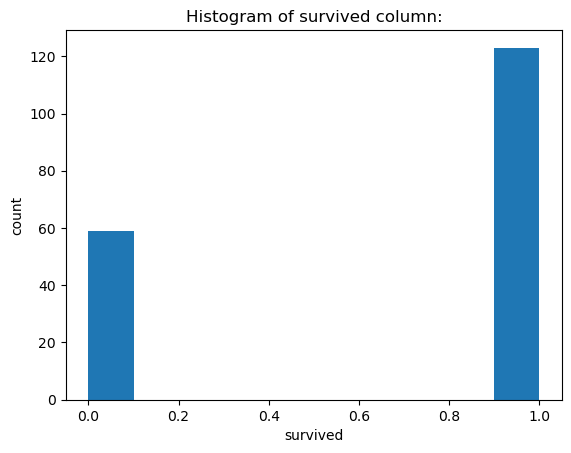

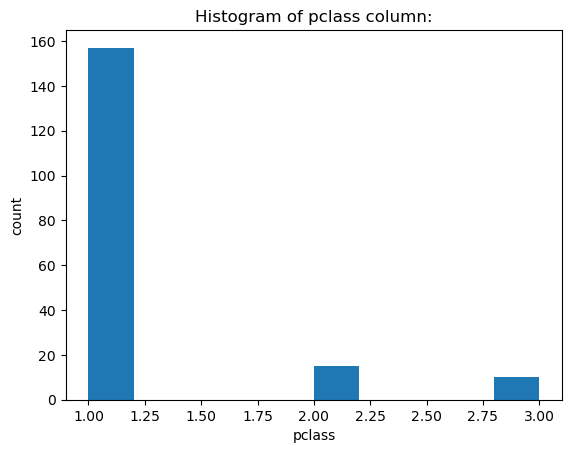

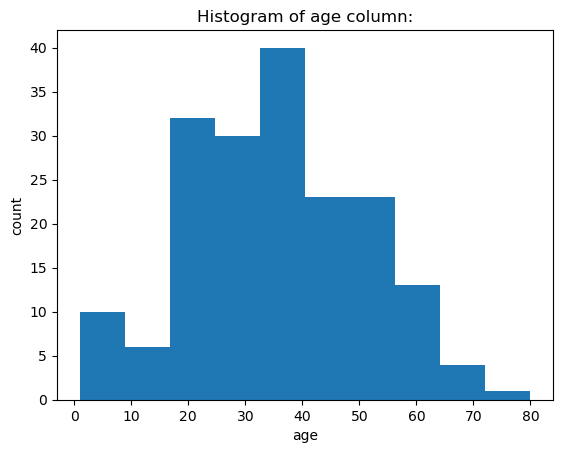

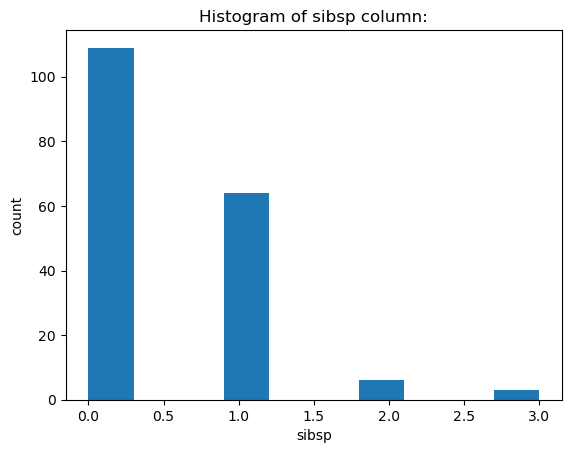

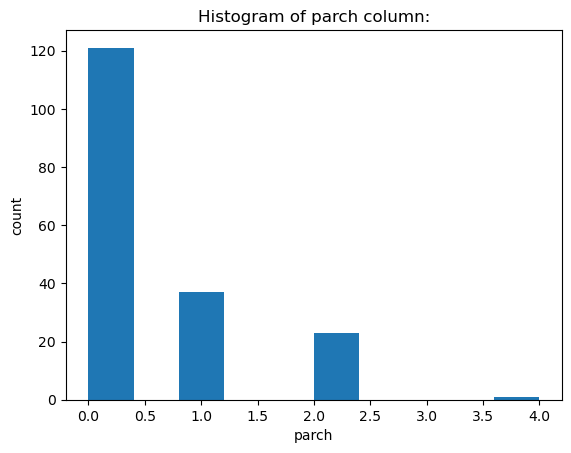

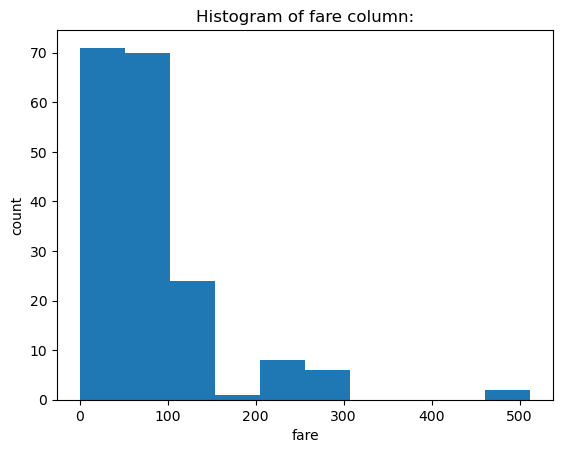

In [22]:
for col in num_col:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column:".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [23]:
data=pd.concat([num_df, cat_df], axis=1)

In [26]:
data.isna().sum()

survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
sex            0
embarked       0
who            0
embark_town    0
alive          0
dtype: int64

## checking column visually

In [29]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Outlier Handling

<function matplotlib.pyplot.show(close=None, block=None)>

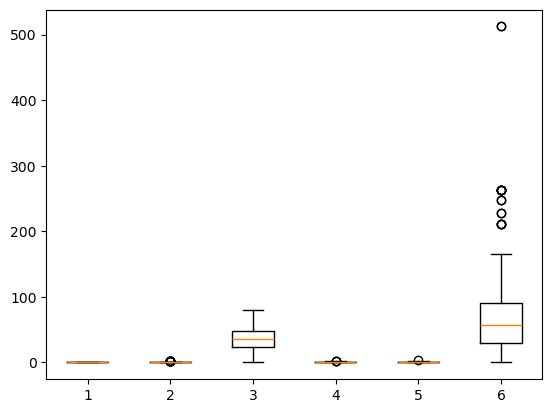

In [32]:
plt.boxplot(num_df)
plt.show

In [34]:
def replace_outliers(df, column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [36]:
for col in num_col:
    num_df[col]=replace_outliers(num_df, col)

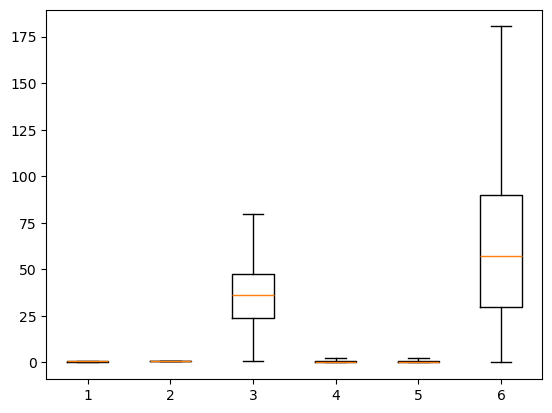

In [38]:
plt.boxplot(num_df)
plt.show()

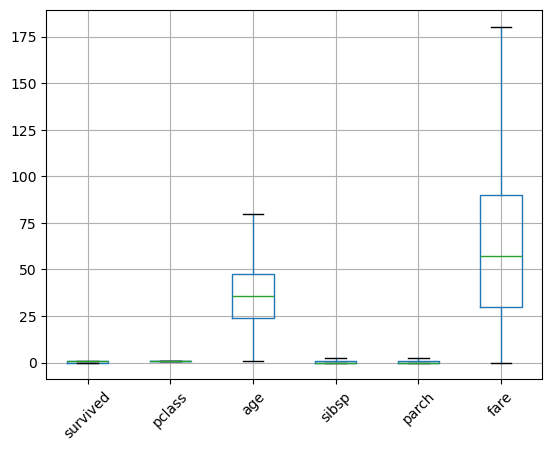

In [40]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [42]:
data['survived'].value_counts()

survived
1    123
0     59
Name: count, dtype: int64

## Plot class imbalance

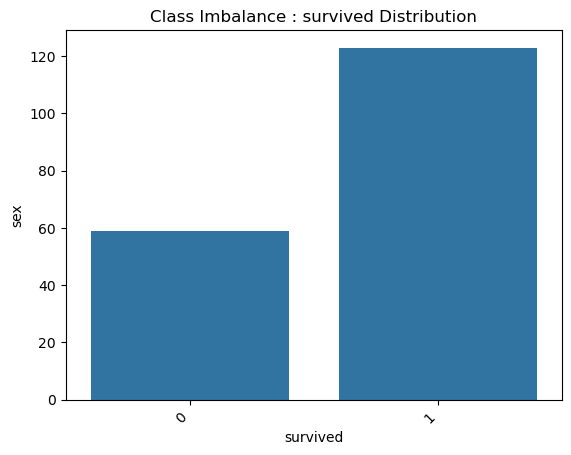

In [51]:
sns.countplot(x='survived', data=data)
plt.title('Class Imbalance : survived Distribution')
plt.xlabel('survived')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
plt.ylabel('sex')
plt.xticks(rotation=45, ha='right')
plt.show()

### Train test split

In [58]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

x=data.drop('survived',axis=1) #seperate features and labels
y=data['sex']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
x_train

pclass   age  sibsp  parch      fare     sex embarked    who  \
52        1  49.0      1      0   76.7292  female        C  woman   
751       3   6.0      0      1   12.4750    male        S  child   
174       1  56.0      0      0   30.6958    male        C    man   
789       1  46.0      0      0   79.2000    male        C    man   
332       1  38.0      0      1  153.4625    male        S    man   
..      ...   ...    ...    ...       ...     ...      ...    ...   
252       1  62.0      0      0   26.5500    male        S    man   
136       1  19.0      0      2   26.2833  female        S  woman   
356       1  22.0      0      1   55.0000  female        S  woman   
96        1  71.0      0      0   34.6542    male        C    man   
806       1  39.0      0      0    0.0000    male        S    man   

     embark_town alive  
52     Cherbourg   yes  
751  Southampton   yes  
174    Cherbourg    no  
789    Cherbourg    no  
332  Southampton    no  
..           ...   ...  
252  Southampton    no  
136  Southampton   yes  
356  Southampton   yes  
96     Cherbourg    no  
806  Southampton    no  

[145 rows x 10 columns]

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
data = sns.load_dataset('titanic')
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [74]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_enc = LabelEncoder()
data['sex_encoded'] = label_enc.fit_transform(data['sex'])
data

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  sex_encoded  
0      man        True  NaN  Southampton    no  False            1  
1    woman       False    C    Cherbourg   yes  False            0  
2    woman       False  NaN  Southampton   yes   True            0  
3    woman       False    C  Southampton   yes  False            0  
4      man        True  NaN  Southampton    no   True            1  
..     ...         ...  ...          ...   ...    ...          ...  
886    man        True  NaN  Southampton    no   True            1  
887  woman       False    B  Southampton   yes   True            0  
888  woman       False  NaN  Southampton    no  False            0  
889    man        True    C    Cherbourg   yes   True            1  
890    man        True  NaN   Queenstown    no   True            1  

[891 rows x 16 columns]

In [90]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_enc = LabelEncoder()
data['class_encoded'] = label_enc.fit_transform(data['class'])
data

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  sex_encoded  \
0      man        True  NaN  Southampton    no  False            1   
1    woman       False    C    Cherbourg   yes  False            0   
2    woman       False  NaN  Southampton   yes   True            0   
3    woman       False    C  Southampton   yes  False            0   
4      man        True  NaN  Southampton    no   True            1   
..     ...         ...  ...          ...   ...    ...          ...   
886    man        True  NaN  Southampton    no   True            1   
887  woman       False    B  Southampton   yes   True            0   
888  woman       False  NaN  Southampton    no  False            0   
889    man        True    C    Cherbourg   yes   True            1   
890    man        True  NaN   Queenstown    no   True            1   

     class_encoded  
0                2  
1                0  
2                2  
3                0  
4                2  
..             ...  
886              1  
887              0  
888              2  
889              0  
890              2  

[891 rows x 17 columns]

One code encoding

In [95]:
class_onebit = pd.get_dummies(data['sex'])
class_onebit

female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[891 rows x 2 columns]

In [103]:
class_onebit=pd.get_dummies(data, columns=['class'])
class_onebit.head()

survived  pclass     sex   age  sibsp  parch     fare embarked    who  \
0         0       3    male  22.0      1      0   7.2500        S    man   
1         1       1  female  38.0      1      0  71.2833        C  woman   
2         1       3  female  26.0      0      0   7.9250        S  woman   
3         1       1  female  35.0      1      0  53.1000        S  woman   
4         0       3    male  35.0      0      0   8.0500        S    man   

   adult_male deck  embark_town alive  alone  sex_encoded  class_encoded  \
0        True  NaN  Southampton    no  False            1              2   
1       False    C    Cherbourg   yes  False            0              0   
2       False  NaN  Southampton   yes   True            0              2   
3       False    C  Southampton   yes  False            0              0   
4        True  NaN  Southampton    no   True            1              2   

   class_First  class_Second  class_Third  
0        False         False         True  
1         True         False        False  
2        False         False         True  
3         True         False        False  
4        False         False         True

In [113]:
data = sns.load_dataset('titanic')
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [115]:
data1=data[['pclass', 'age', 'sibsp', 'parch', 'fare']]
data1

pclass   age  sibsp  parch     fare
0         3  22.0      1      0   7.2500
1         1  38.0      1      0  71.2833
2         3  26.0      0      0   7.9250
3         1  35.0      1      0  53.1000
4         3  35.0      0      0   8.0500
..      ...   ...    ...    ...      ...
886       2  27.0      0      0  13.0000
887       1  19.0      0      0  30.0000
888       3   NaN      1      2  23.4500
889       1  26.0      0      0  30.0000
890       3  32.0      0      0   7.7500

[891 rows x 5 columns]

In [117]:
numerical_col = ['pclass', 'age', 'sibsp', 'parch', 'fare']
scaled_data1=std_scaler.fit_transform(data1[numerical_col])
scaled_data1

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'